In [1]:
# Load all relevant libraries

import pandas as pd
import imblearn
import seaborn as sns

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import classification_report

import sklearn.metrics as metrics

In [2]:
# Load data

credit=pd.read_csv('creditcard.csv')
credit_copy=credit.copy()
credit_copy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Explore the data - Determine data types

credit_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All Numeric columns

In [4]:
# target variable is Class
# 1 = default
# 0 = valid payments

var_count= credit_copy['Class'].value_counts(dropna = False)
var_count


0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

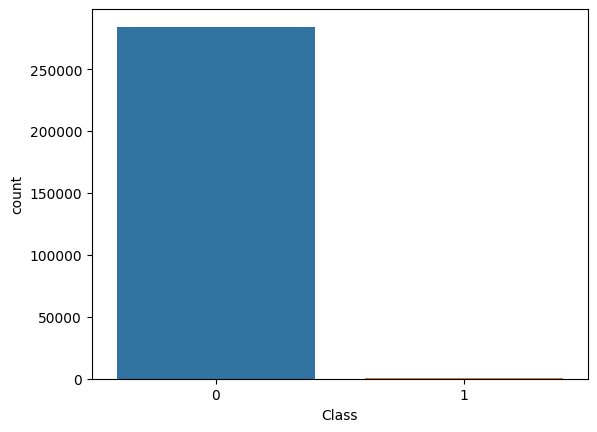

In [5]:
# Bar chart of outcome

sns.countplot(x = 'Class', data = credit_copy)

In [6]:
# Calculate percentages of payment in portfolio

count_no_pay = len(credit_copy[credit_copy['Class']==1])
count_pay    = len(credit_copy[credit_copy['Class']==0])

pct_of_no_pay = count_no_pay/(count_no_pay+count_pay)
print("percentage of no payment is", pct_of_no_pay*100)

pct_of_pay = count_pay/(count_no_pay+count_pay)
print("percentage of payment", pct_of_pay*100)

percentage of no payment is 0.1727485630620034
percentage of payment 99.82725143693798


Less than 1% of the credit card payments are default

In [7]:
# Check for duplicates
sum(credit_copy.duplicated())

1081

Data contains duplicates

In [8]:
#Drop Duplicates
credit_copy.drop_duplicates(inplace = True)

In [9]:
sum(credit_copy.duplicated())

0

Dropped duplicates

In [10]:
#Check for null values
credit_copy.isna().sum().sum()

0

No null values

In [12]:
# Preprocessing - select and transform continuous predictors (rescaling / polynomial transform)

numeric_features = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', 'Amount']
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

In [ ]:
Transformed numerical features using polynomial transform and recaling using standardscaler

In [28]:
#Create preprocessor using transformed numerical column using the Column Transformer module

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [29]:
# Define SMOTE and LR algorithm

smt = SMOTE(random_state=42,sampling_strategy= 'minority')
lor = LogisticRegression(C = 50)

In [30]:
# Chain all of the steps using imbalance pipeline module

clf = Pipeline([('preprocessor', preprocessor),('smt', smt),
                ('lor',lor)])

In [31]:
# Split the data into test/train
# Fit the training data using chained pipeline - preprocessing steps, imbalance module, LR 

y = credit_copy['Class']
X = credit_copy.drop('Class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50 )
clf.fit(X_train, y_train)

c:\users\haris\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('smt', SMOTE(random_state=42, sampling_strategy='minority')),
                ('lor', LogisticRegression(C=50))])

In [32]:
# Compute model accuracy

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9944876265308232
0.9937404838436813


In [ ]:
The model has an average of 99.4% accuracy

In [33]:
clf_predicted = clf.predict(X_test)

In [34]:
# Generate confusion matrix

confusion = confusion_matrix(y_test, clf_predicted)
confusion

array([[70384,   418],
       [   26,   104]], dtype=int64)

In [35]:
# Classification Report
# Precision, recall and F1-score of our model.

print(classification_report(y_test, clf_predicted, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70802
           1       0.20      0.80      0.32       130

    accuracy                           0.99     70932
   macro avg       0.60      0.90      0.66     70932
weighted avg       1.00      0.99      1.00     70932



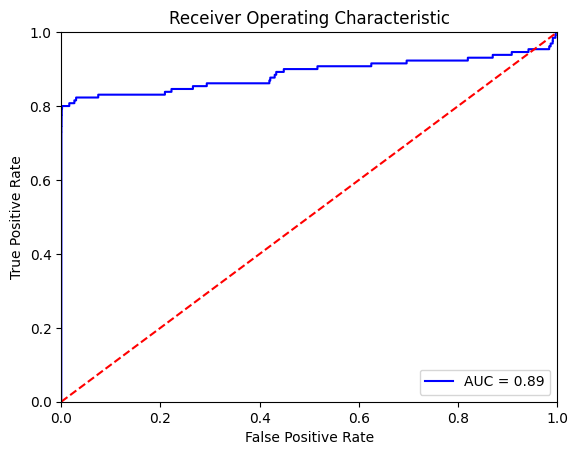

In [36]:
# calculate the fpr and tpr for all thresholds of the classification

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()